In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read data
df = pd.read_csv("/content/drive/MyDrive/Machine Learning Final Project/online_shoppers_intention.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [ ]:
df[df.columns[11:15]]=df[df.columns[11:15]].astype('category')
df.dtypes

Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                        object
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                  object
Weekend                        bool
Revenue                        bool
dtype: object


## **EDA**

In [ ]:
# Miss two months of data
df['Month'].unique() 

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [ ]:
# data is imbalanced, subject to further processing before modeling
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

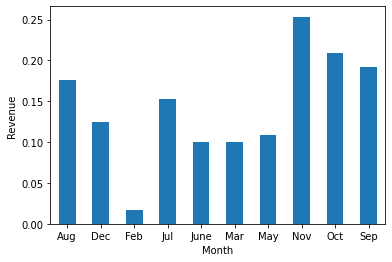

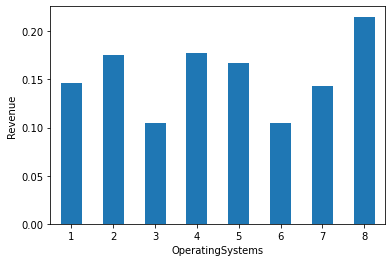

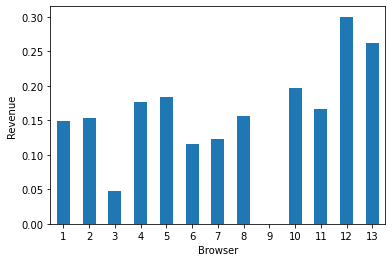

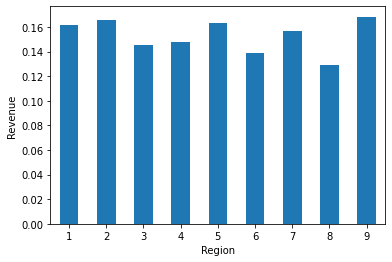

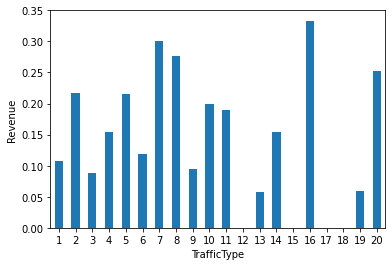

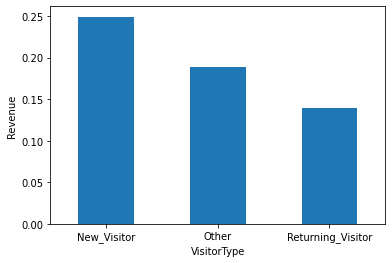

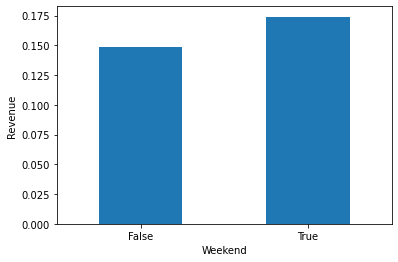

In [ ]:
# plot categorical variables vs revenue (if true, purchase made; if false, no purchase made)
for col in df.columns[10:17]:
    df.groupby(col).mean()['Revenue'].plot.bar(rot=0, ylabel='Revenue')
    plt.show()

In [ ]:
# encode target variable
df['Revenue'] = df['Revenue'].replace({True:1, False:0})

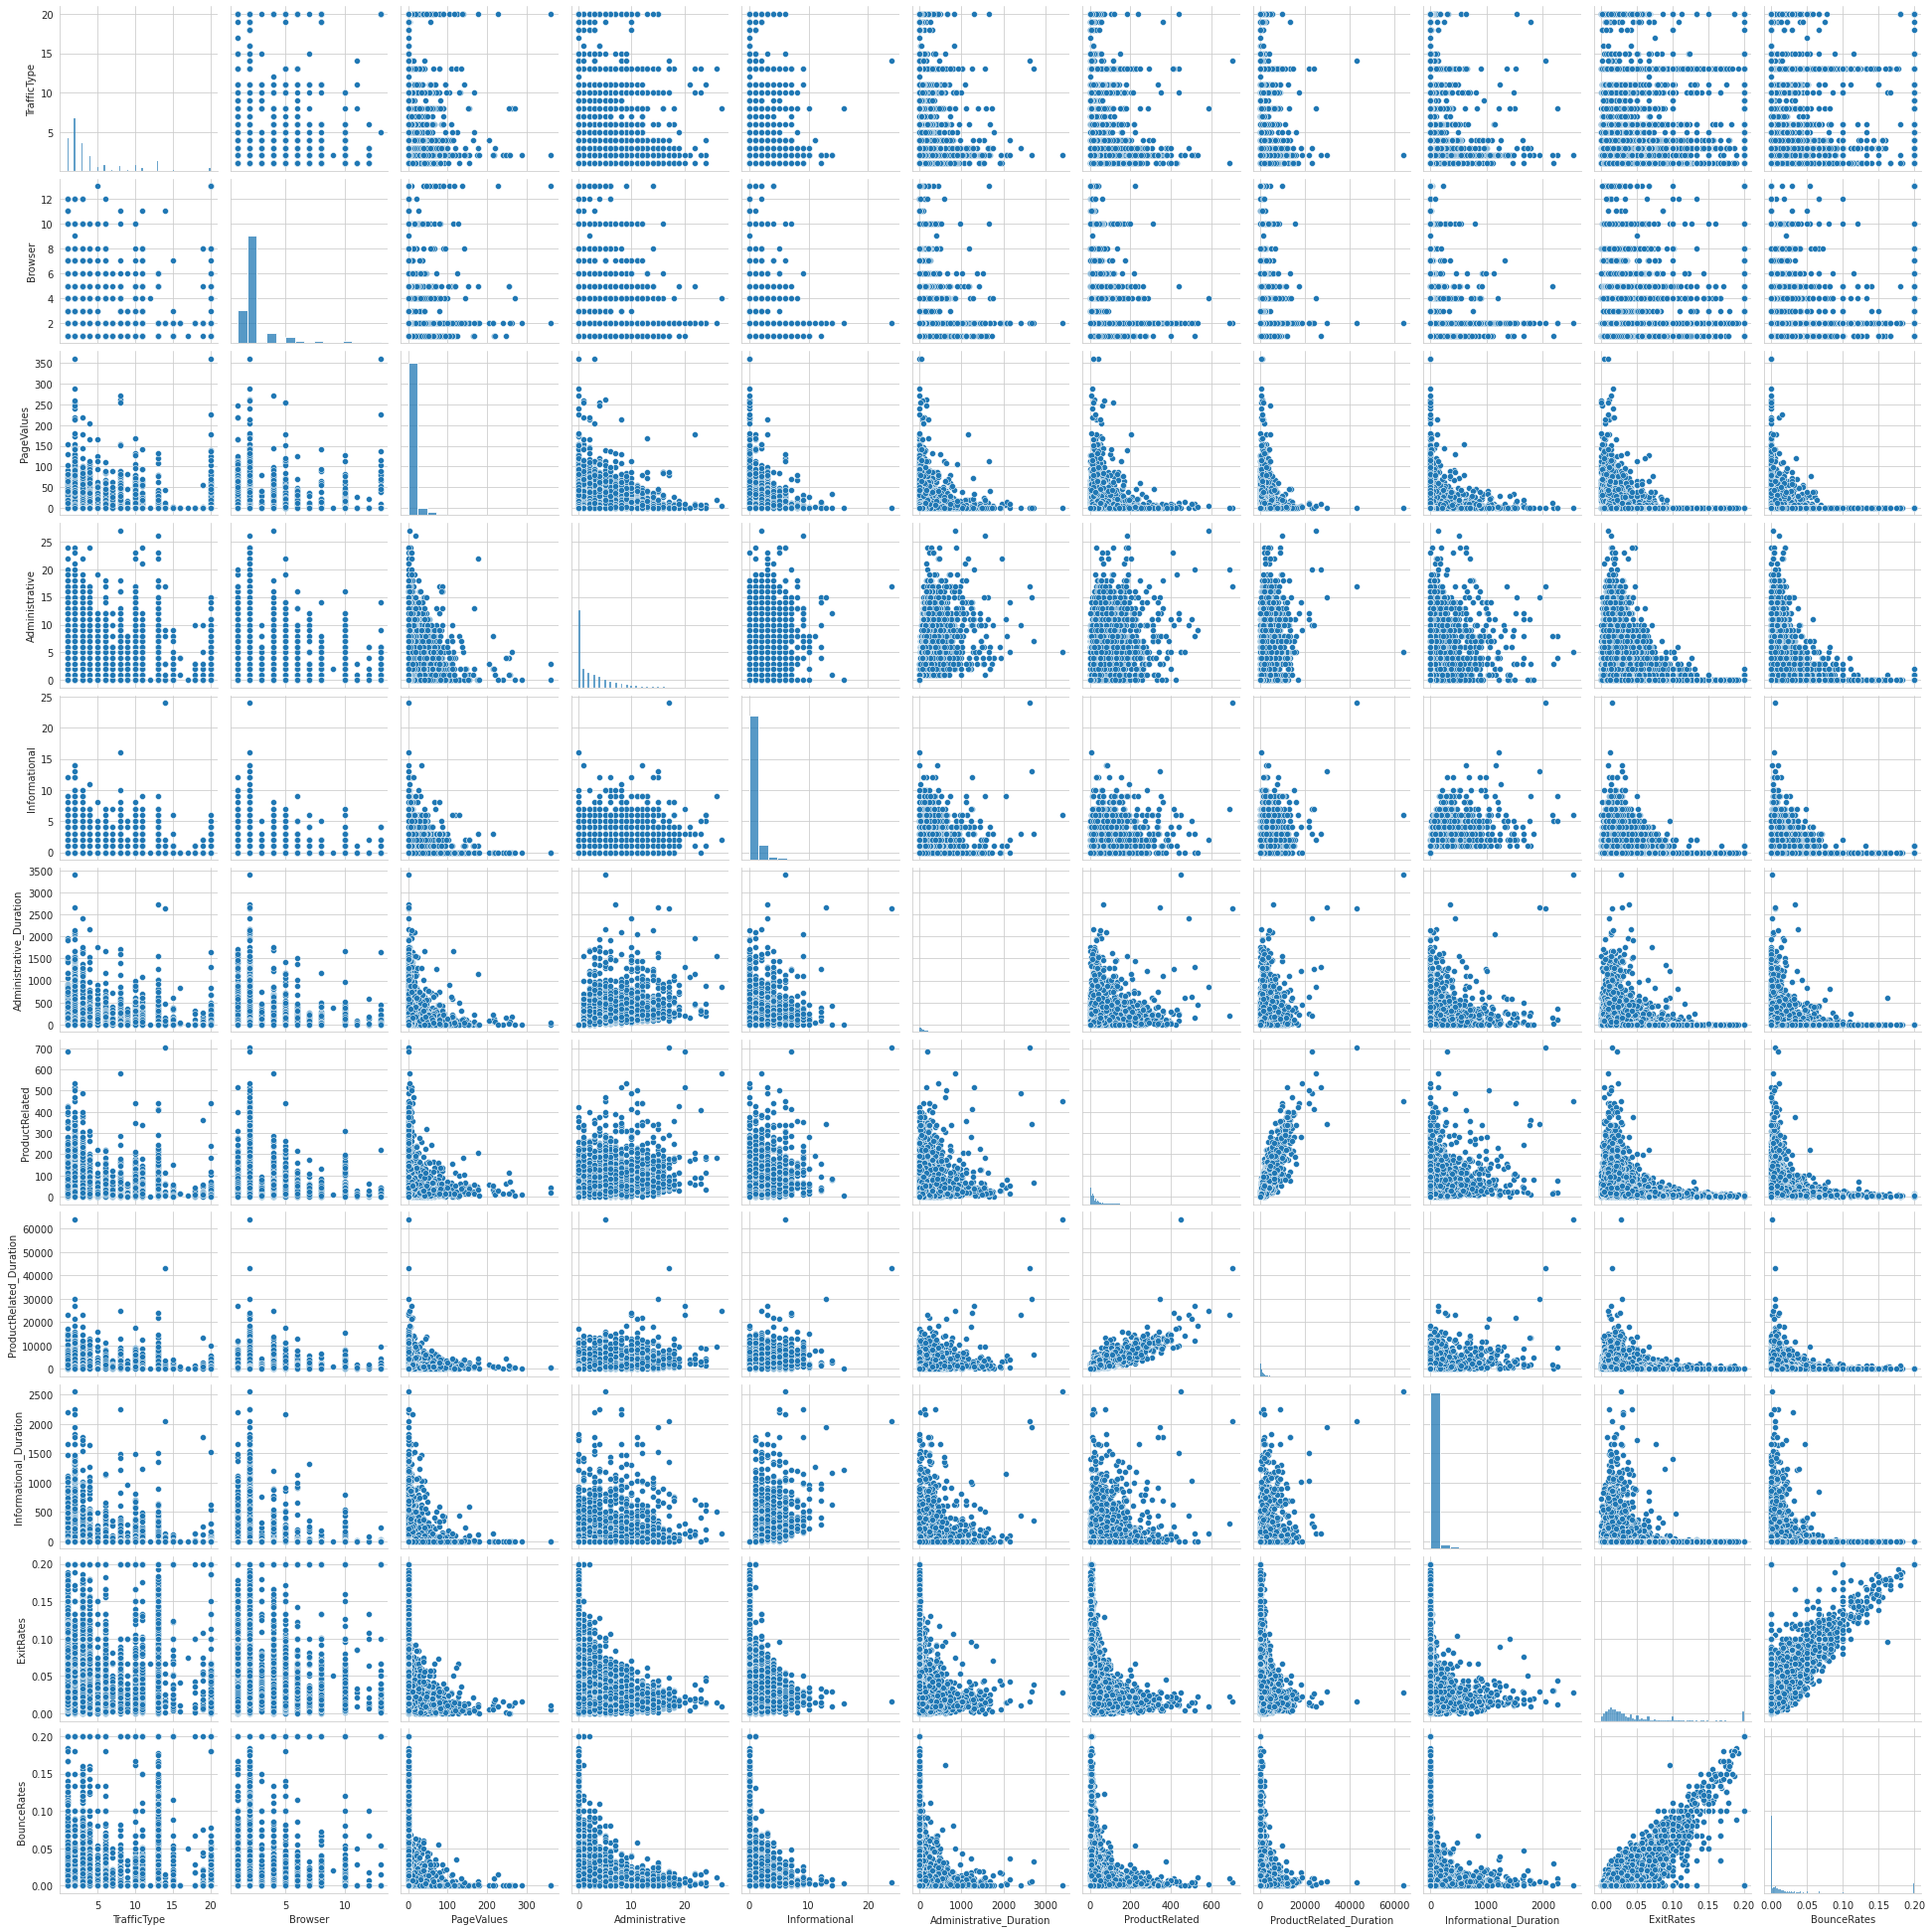

In [ ]:
# plot side-by-side correlation graph
cat_var = ['Month', 'VisitorType']

num_var = list(set(df.columns).difference(cat_var))
num_var.remove('Revenue')

temp = num_var.copy()
temp = list(set(temp).difference(['Weekend', 'Region', 'SpecialDay', 'OperatingSystems']))


sns.set_style("whitegrid");
sns.pairplot(df[temp]);
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


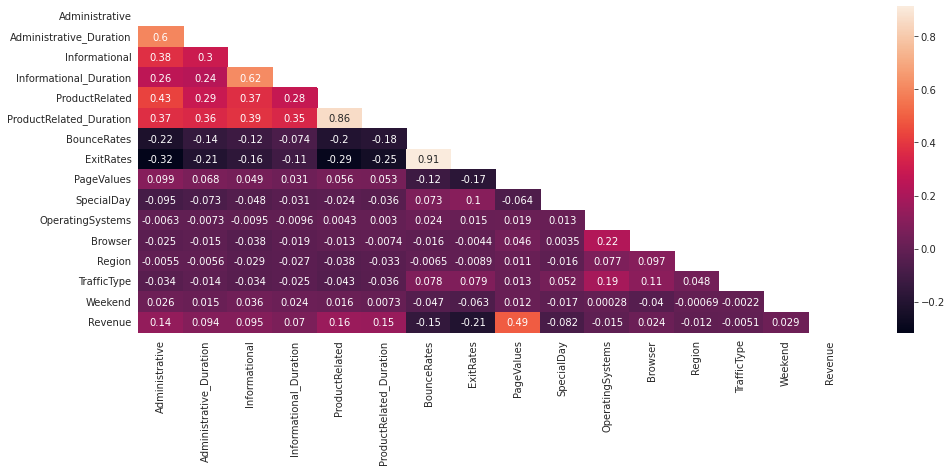

In [ ]:
# plot heat map
plt.figure(figsize = (16,6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(), mask = mask, annot=True)
plt.show()

In [ ]:
# drop parameters with minimal correlation with revenue and target variable Revenue 
clean_df = df.drop(['OperatingSystems', 'Browser','Region','TrafficType','Weekend','Revenue'], axis=1)
clean_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,VisitorType
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,Returning_Visitor
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,Returning_Visitor
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,Returning_Visitor
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,Returning_Visitor
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,Returning_Visitor
...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,Returning_Visitor
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,Returning_Visitor
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,Returning_Visitor
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,Returning_Visitor


In [ ]:
#get dummy for categorical columns
clean_df=pd.get_dummies(clean_df)
clean_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
#standard scale for num columns
from sklearn.preprocessing import StandardScaler
data = clean_df.iloc[:, 0:10]
scaler = StandardScaler()
clean_df.iloc[:, 0:10] = scaler.fit_transform(data)
clean_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,0,1
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,0,1
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,0,1
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,0,1
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,...,0,0,0,0,0,0,0,0,0,1
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,...,0,0,0,0,1,0,0,0,0,1
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,...,0,0,0,0,1,0,0,0,0,1
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
#perform train test split
from sklearn.model_selection import train_test_split
X=clean_df
y=df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#check shapes of datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(8261, 23)
(8261,)
(4069, 23)
(4069,)


In [ ]:
#perform SMOTE on training set to deal with imbalance data
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_over, y_train_over = oversample.fit_resample(X_train,y_train) 

In [ ]:
#check shapes of train date after SMOTE
print(X_train_over.shape)
print(y_train_over.shape)

(13972, 23)
(13972,)


In [ ]:
#concat and save train set
train_dataset = pd.concat([X_train_over,y_train_over],axis=1)
train_dataset
train_dataset.to_csv('/content/drive/MyDrive/Machine Learning Final Project/train.csv')

In [ ]:
#concat and save test set
test_dataset = pd.concat([X_test,y_test],axis=1)
test_dataset.to_csv('/content/drive/MyDrive/Machine Learning Final Project/test.csv')


# Model

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Machine Learning Final Project/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Machine Learning Final Project/test.csv")

In [ ]:
y_train = train['Revenue']
x_train = train.drop('Revenue', axis=1) 

y_test = test['Revenue']
x_test = test.drop('Revenue', axis=1) 

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

print('Logistic Regression')
print('Training accuracy {:.4f}'.format(log_reg.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(log_reg.score(x_test,y_test)))

Logistic Regression
Training accuracy 0.9188
Testing accuracy 0.7085


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Naive Bayes

In [ ]:
x_train.head() 

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.507228,0.957060,-0.396478,-0.244931,-0.466151,-0.405910,-0.457683,-0.592393,-0.317178,...,0,0,0,1,0,0,0,1,0,0
1,1,4.119891,1.325586,4.327541,0.805680,3.176451,2.644384,-0.405476,-0.665417,-0.317178,...,0,0,1,0,0,0,0,0,0,1
2,2,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.490045,-0.457683,-0.680586,-0.317178,...,0,0,0,1,0,0,0,0,0,1
3,3,-0.094882,-0.287481,-0.396478,-0.244931,-0.488636,-0.561116,-0.113944,-0.371910,-0.317178,...,0,0,0,1,0,0,0,1,0,0
4,4,2.012504,3.724044,-0.396478,-0.244931,-0.286270,0.240618,-0.457683,-0.419926,1.189207,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.naive_bayes import BernoulliNB

# fit naive bayes model
nb = BernoulliNB()
nb.fit(x_train, y_train)

print('Naive Bayes')
print('Training accuracy {:.4f}'.format(nb.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(nb.score(x_test,y_test)))

Naive Bayes
Training accuracy 0.8038
Testing accuracy 0.7555


### lightGBM


In [ ]:
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
model = lgb.LGBMClassifier(learning_rate=0.01,max_depth=5,random_state=42)
model.fit(X_train_over,y_train_over,eval_set=[(X_test,y_test),(X_train_over,y_train_over)],
          verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.584894	training's binary_logloss: 0.584894	valid_0's binary_logloss: 0.589635	valid_0's binary_logloss: 0.589635
[40]	training's binary_logloss: 0.50892	training's binary_logloss: 0.50892	valid_0's binary_logloss: 0.517845	valid_0's binary_logloss: 0.517845
[60]	training's binary_logloss: 0.452832	training's binary_logloss: 0.452832	valid_0's binary_logloss: 0.465497	valid_0's binary_logloss: 0.465497
[80]	training's binary_logloss: 0.410295	training's binary_logloss: 0.410295	valid_0's binary_logloss: 0.426569	valid_0's binary_logloss: 0.426569
[100]	training's binary_logloss: 0.377902	training's binary_logloss: 0.377902	valid_0's binary_logloss: 0.397491	valid_0's binary_logloss: 0.397491


LGBMClassifier(learning_rate=0.01, max_depth=5, random_state=42)

In [ ]:
print('Training accuracy {:.4f}'.format(model.score(X_train_over,y_train_over)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.8881
Testing accuracy 0.8729


In [ ]:
y_pred_train = model.predict(X_train_over)
y_pred_test = model.predict(X_test)

In [ ]:
metrics.classification_report(y_train, y_pred_train)

'              precision    recall  f1-score   support\n\n           0       0.89      0.88      0.89      6986\n           1       0.88      0.89      0.89      6986\n\n    accuracy                           0.89     13972\n   macro avg       0.89      0.89      0.89     13972\nweighted avg       0.89      0.89      0.89     13972\n'

In [ ]:
metrics.classification_report(y_test, y_pred_test)

'              precision    recall  f1-score   support\n\n           0       0.96      0.88      0.92      3436\n           1       0.56      0.82      0.67       633\n\n    accuracy                           0.87      4069\n   macro avg       0.76      0.85      0.79      4069\nweighted avg       0.90      0.87      0.88      4069\n'

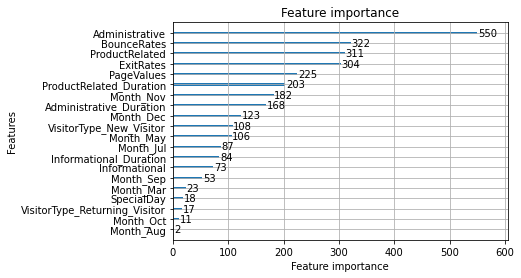

In [ ]:
# important features
lgb.plot_importance(model)

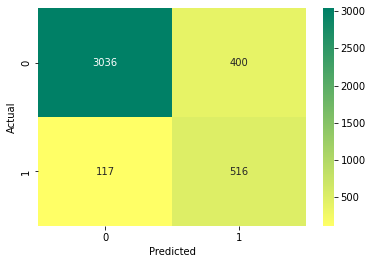

In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred_test)
#ticks = ['mini','midi','maxi']
sns.heatmap(matrix, annot=True, fmt='g', cmap='summer_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### MLP

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (7,7)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import binary_crossentropy

In [ ]:
y_train = pd.DataFrame(y_train_over)
y_test = pd.DataFrame(y_test)

In [ ]:
#create model
model = Sequential()

#get number of columns in training data
n_cols = x_train.shape[1]

#add layers to model
#model.add(Dense(30, activation='sigmoid', input_shape=(n_cols,)))
model.add(Dense(50, input_dim=n_cols, activation='relu'))
model.add(Dense(50, input_dim=n_cols, activation='relu'))
model.add(Dense(50, input_dim=n_cols, activation='relu'))
model.add(Dense(50, input_dim=n_cols, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss=binary_crossentropy, metrics=['accuracy'])

#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                1250      
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 50)                2550      
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8,951
Trainable params: 8,951
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_callbacks = [
    EarlyStopping(patience=10),
    ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    TensorBoard(log_dir='logs'),
]

In [ ]:
#train model
history = model.fit(x_train, y_train, epochs=30,  validation_data=(x_test,y_test), callbacks=my_callbacks)

Epoch 1/30
437/437 [==============================] - 2s 4ms/step - loss: 3.7677 - accuracy: 0.5461 - val_loss: 7.4694 - val_accuracy: 0.2281
Epoch 2/30
437/437 [==============================] - 2s 4ms/step - loss: 1.5811 - accuracy: 0.6658 - val_loss: 0.4558 - val_accuracy: 0.8454
Epoch 3/30
437/437 [==============================] - 2s 3ms/step - loss: 1.0988 - accuracy: 0.6716 - val_loss: 2.6519 - val_accuracy: 0.4008
Epoch 4/30
437/437 [==============================] - 2s 3ms/step - loss: 1.2144 - accuracy: 0.6841 - val_loss: 1.5160 - val_accuracy: 0.4945
Epoch 5/30
437/437 [==============================] - 2s 4ms/step - loss: 0.5426 - accuracy: 0.7869 - val_loss: 2.6845 - val_accuracy: 0.4293
Epoch 6/30
437/437 [==============================] - 2s 4ms/step - loss: 0.9181 - accuracy: 0.7345 - val_loss: 0.4926 - val_accuracy: 0.7385
Epoch 7/30
437/437 [==============================] - 1s 3ms/step - loss: 0.4173 - accuracy: 0.8305 - val_loss: 1.1326 - val_accuracy: 0.5505
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


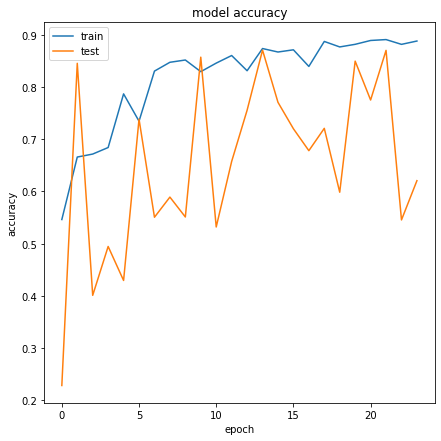

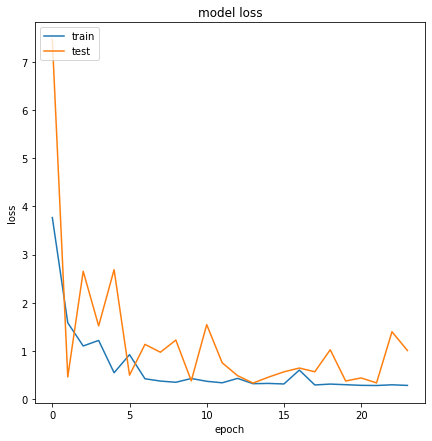

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

predict_x=model.predict(x_test) 
y_pred_test=np.argmax(predict_x,axis=1)

classification_report(y_test, y_pred_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.84      1.00      0.92      3436\n           1       0.00      0.00      0.00       633\n\n    accuracy                           0.84      4069\n   macro avg       0.42      0.50      0.46      4069\nweighted avg       0.71      0.84      0.77      4069\n'

In [ ]:
predict_x=model.predict(x_train) 
y_pred_train=np.argmax(predict_x,axis=1)

classification_report(y_train, y_pred_train)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.50      1.00      0.67      6986\n           1       0.00      0.00      0.00      6986\n\n    accuracy                           0.50     13972\n   macro avg       0.25      0.50      0.33     13972\nweighted avg       0.25      0.50      0.33     13972\n'

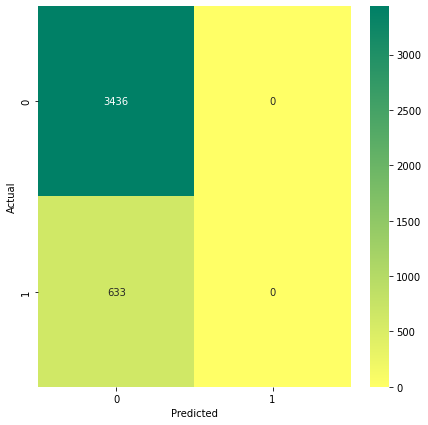

In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(matrix, annot=True, fmt='g', cmap='summer_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

We test four classification models: Logistic Regression, Naive Bayes, lightGBM, and Multilayer Perceptrons. Among them, Logistic Regression achieve 0.92 accuracy rate on training set and 0.70 accuracy rate on testing set. Naive Bayes achieve 0.89 accuracy rate on training set and 0.75 accuracy rate on testing set. MLP achieve 0.83 accuracy rate on training set and 0.63 accuracy rate on testing set. 

We select lightGBM as our best model since it has best accuracy score, 0.89 on training and 0.87 on testing. Compare to other models, lightGBM solves the issues of overfirring and the result is more robust. Also, lightGBM trains very fast and requires less computing resources. 


**Assumptions:**  
We assume that 'OperatingSystems', 'Browser','Region','TrafficType','Weekend'
Will not influence if a online shopper will purchase or not


Also we assume Jan and April does not have data and that reflects the real life


**Recommendations**  

If possible, we can ask for the data for missing month and collect more data with successful purchase to better train our models

Also, we can do more feature engineering or include more features into the model to check if the model accuracy improves.

We can iterate through different combinations for MLP to get the best model for future steps

Lastly, we can also perform grid search and CV techniques to fine tune the model

**Insights**

Our team trained a model with farily good performance. We found out that customers view certain pages (Administrative and Product Related) tend to best predict their purchase. Thus, the company should put effort to design and put marketing campaign on such websites. 

Timewise, we realize that customers visting the website during Nov and Dec has higher importance in predicting revenue. We believe this makes sense because Nov and Dec are periods for Black Friday and Christmas. 
